In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

## Load Dataset

In [3]:
df = pd.read_csv('train.data', header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008


In [3]:
df["index"]=list(range(7154))# 加一列index在训练时会用到
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,index
0,2,-56,-0.33,-0.09,0.90,0.2,-11,12,0.004,-0.1,...,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.032,-0.0009,0
1,470,-39,0.02,0.12,0.39,-0.6,-12,8,0.009,-1.6,...,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.034,-0.0011,1
2,165,4,0.14,0.14,0.78,0.4,-11,-9,-0.003,-0.2,...,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.034,-0.0012,2
3,-113,5,-0.12,0.11,1.06,0.6,-10,-7,-0.008,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.9,0.033,-0.0011,3
4,-411,-21,-0.17,0.07,1.33,-0.6,-11,0,0.002,0.1,...,0.0,0.0,0.0,0.0,-0.002,0.0,0.9,0.032,-0.0008,4


## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7154 entries, 0 to 7153
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7154 non-null   int64  
 1   1       7154 non-null   int64  
 2   2       7154 non-null   float64
 3   3       7154 non-null   float64
 4   4       7154 non-null   float64
 5   5       7154 non-null   float64
 6   6       7154 non-null   int64  
 7   7       7154 non-null   int64  
 8   8       7154 non-null   float64
 9   9       7154 non-null   float64
 10  10      7154 non-null   float64
 11  11      7154 non-null   float64
 12  12      7154 non-null   float64
 13  13      7154 non-null   float64
 14  14      7154 non-null   float64
 15  15      7154 non-null   float64
 16  16      7154 non-null   float64
 17  17      7154 non-null   float64
 18  18      7154 non-null   float64
 19  19      7154 non-null   float64
 20  20      7154 non-null   float64
 21  21      7154 non-null   float64
 22  

## Split The Dataset

In [5]:
index=np.insert(df.columns[0:40].values,0,"index") # 加一列index在训练时会用到
Features = df[index].values
Labels = df[[df.columns[41],df.columns[40]]].values
train_features = Features[:round(0.8 * len(Features))]
train_labels = Labels[:round(0.8 * len(Features))]
test_features = Features[round(0.8 * len(Features)):]
test_labels = Labels[round(0.8 * len(Features)):]

In [6]:
Features[:5,:5]

array([[ 0.00e+00,  2.00e+00, -5.60e+01, -3.30e-01, -9.00e-02],
       [ 1.00e+00,  4.70e+02, -3.90e+01,  2.00e-02,  1.20e-01],
       [ 2.00e+00,  1.65e+02,  4.00e+00,  1.40e-01,  1.40e-01],
       [ 3.00e+00, -1.13e+02,  5.00e+00, -1.20e-01,  1.10e-01],
       [ 4.00e+00, -4.11e+02, -2.10e+01, -1.70e-01,  7.00e-02]])

In [7]:
Labels[0:5,:]

array([[ 0.0e+00, -9.0e-04],
       [ 1.0e+00, -1.1e-03],
       [ 2.0e+00, -1.2e-03],
       [ 3.0e+00, -1.1e-03],
       [ 4.0e+00, -8.0e-04]])

## Regression Tree

In [7]:
# 回归树的树结点
class TreeNode:
    '''
    left: 左孩子结点
    right: 右孩子结点
    index: 该结点所包含数据的在数据集中的下标
    isLeaf : 是否是叶子结点
    bestFeature : 最佳划分特征
    bestValue : 最佳划分特征的最佳划分值
    weight : 叶子结点的权重
    '''
    def __init__(self):
        self.right = None
        self.left = None
        self.index = None
        self.isLeaf = None
        self.bestFeature = None
        self.bestValue = None
        self.weight = None


class RegressionTree(object):
    def __init__(self, Lambda, gamma, max_depth = 5):  # 初始化回归树
        self.train_features = None
        self.train_labels = None
        self.Lambda = Lambda
        self.gamma = gamma
        self.y_pred = None
        self.root = None
        self.max_depth =max_depth

    def _Obj(self, train_index):  # 得分 Obj
        G = np.sum(-2 * (np.reshape(self.train_labels[train_index][:, 1], [
                   self.train_labels[train_index].shape[0], 1])-self.y_pred[train_index]))
        H = 2 * train_index.shape[0]
        Obj = -0.5 * (G ** 2)/(H + self.Lambda) + self.gamma
        return Obj

    def _split(self, train_index, feature, value):  # 划分左右孩子
        left_index = []
        right_index = []
        for data in self.train_features[train_index]:
            if data[feature] < value:
                left_index.append(int(data[0]))
            else:
                right_index.append(int(data[0]))
        return np.array(left_index), np.array(right_index)

    def _choose_split_point(self, train_index):  # 获取最佳的划分点
        flag=1 # 是否划分
        max_gain = float("-inf")
        temp_gain = 0
        bestFeature = 0  # 最优划分特征下标
        bestValue = 0  # 最优划分点下标
        p_obj = self._Obj(train_index)
        for feature in range(1, len(self.train_features[0]), 1): # 遍历特征
            ordered_values = sorted(
                list(set(self.train_features[train_index, feature])))
            if len(set(self.train_features[train_index, feature])) == 1: 
                continue
            for i in range(len(set(self.train_features[train_index, feature]))-1):
                left_index, right_index = self._split(
                    train_index, feature, (ordered_values[i]+ordered_values[i+1])/2) # 防止出现
                left_obj = self._Obj(left_index)
                right_obj = self._Obj(right_index)
                temp_gain = p_obj - left_obj - right_obj
                if temp_gain > max_gain:
                    bestFeature = feature
                    bestValue = (ordered_values[i]+ordered_values[i+1])/2
                    max_gain = temp_gain
        if max_gain < 0:
            flag = 0
        return bestFeature, bestValue, flag

    def _create_tree(self, train_index, depth):
        z = TreeNode()
        z.index = self.train_labels[train_index, 0]
        z.isLeaf = False
        if len(z.index) < 50 or depth >= self.max_depth:  # 结点数据数小于50或者深度超过最大深度标记为叶子结点
            z.isLeaf = True
            z.weight = -np.sum(-2 * (np.reshape(self.train_labels[train_index][:, 1], [self.train_labels[train_index].shape[0], 1])-self.y_pred[train_index])) / (
                2 * train_index.shape[0] + self.Lambda)
        else:
            best_feature, best_value, flag = self._choose_split_point(train_index)
            if flag:
                z.bestFeature = best_feature
                z.bestValue = best_value
                left_index, right_index = self._split(
                    train_index, best_feature, best_value)
                z.left = self._create_tree(left_index, depth+1)  # 递归创建左子树
                z.right = self._create_tree(right_index, depth+1)  # 递归创建右子树
            else: # 增益小于某个值则不划分
                z.isLeaf = True
                z.weight = -np.sum(-2 * (np.reshape(self.train_labels[train_index][:, 1], [self.train_labels[train_index].shape[0], 1])-self.y_pred[train_index])) / (
                    2 * train_index.shape[0] + self.Lambda)
        return z

    def fit(self, train_features, train_labels, y_pred):  # 训练一棵回归树
        self.train_features = train_features
        self.train_labels = train_labels
        self.y_pred = y_pred
        train_index = train_labels[:, 0].astype(int)
        self.root = self._create_tree(train_index,depth=0)

    def predict(self, test_features):  # 预测样本
        pred = []
        for feature in test_features:
            z = self.root
            while z.isLeaf == False:
                if feature[z.bestFeature] < z.bestValue:
                    z = z.left
                else:
                    z = z.right
            pred.append(z.weight)
        return pred


## XGBoost

In [77]:
class XGBoost(object):
    '''
    y_pred: 当前训练时所用到的之前的树的预测值
    max_epoch: 树的最大颗数
    tree: 树的根结点集合
    MSE_: 均方误差
    '''


    def __init__(self,):
        self.y_pred = None
        self.max_epoch = None
        self.tree = []
        self.MSE_ = []
        self.RMSE_ = []
        self.R2_ = []
        #self.temp = [] #使得计算第k+1颗树的时候可以用到第k个树的结果

    # 均方误差
    def MSE(self,y_true, y_pred):
        return np.sum((y_true - y_pred) ** 2) / len(y_true)

    # 均方根误差
    def RMSE(self,y_true, y_pred):
        return np.sqrt(self.MSE(y_true, y_pred))

    # 相关系数
    def R2(self,y_true, y_pred):
        return 1 - self.MSE(y_true, y_pred) / np.var(y_true)

    def fit(self, train_features, train_labels,  max_epoch = 5,max_depth = 5,Lambda=1,gamma=1e-5):
        self.max_epoch = max_epoch
        y_pred = np.reshape(np.zeros(train_labels.shape[0]),[train_labels.shape[0],1]) # 初次训练的y_pred设为0
        for i in range(self.max_epoch):
            print("第",i+1,"颗树正在训练...")
            temp_tree = RegressionTree(Lambda=Lambda,gamma=gamma,max_depth=max_depth)
            temp_tree.fit(train_features, train_labels,y_pred)
            self.tree.append(temp_tree)
            y_pred+=np.reshape(np.array(temp_tree.predict(train_features)),[train_labels.shape[0],1])
            self.MSE_.append(self.MSE(np.reshape(train_labels[:,1],[train_labels.shape[0],1]), y_pred))
            self.RMSE_.append(self.RMSE(np.reshape(train_labels[:,1],[train_labels.shape[0],1]), y_pred))
            self.R2_.append(self.R2(np.reshape(train_labels[:,1],[train_labels.shape[0],1]), y_pred))
            print("第",i+1,"颗树训练完成")
            print("测试集MSE",np.sum((test_labels[:,1]-self.predict(test_features))**2)/len(test_labels))
            #self.temp.append(np.sum((test_labels[:,1]-self.predict(test_features))**2)/len(test_labels)) 
            # 使得计算第k+1颗树的时候可以用到第k个树的结果

        print("MSE",self.MSE_)
        print("RMSE",self.RMSE_)
        print("R2",self.R2_)


    def predict(self,test_features):
        pred = np.zeros(test_features.shape[0])
        for tree in self.tree:
            pred+=tree.predict(test_features)
        return pred


## 调参

模型中可调参数有：
- gamma:树节点个数的惩罚系数
- Lambda:权重 w 的系数
- max_epoch:最大的树的颗数
- max_depth:树的最大深度

首先对于参数 **gamma** 进行调整，选取了 $10,1,0.1,0.01,10^{-3},10^{-4},10^{-5},10^{-6},10^{-7},10^{-8}$ 这十个值来估计 gamma 的大致范围

In [20]:
G=[10,1,0.1,0.01,1e-3,1e-4,1e-5,1e-6,1e-7,1e-8]
for g in G:
    model = XGBoost()
    print("gamma",g)
    model.fit(train_features,train_labels,max_epoch=3,max_depth=3,Lambda=1.0,gamma=g)
    print("测试集MSE:",np.sum((test_labels[:,1]-model.predict(test_features))**2)/len(test_labels))

gamma 10
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [1.6727294760017256e-07, 1.6727294205011134e-07, 1.672729420501113e-07]
RMSE [0.000408990155871963, 0.00040899014908688365, 0.00040899014908688365]
R2 [-3.3179671676819567e-08, -2.220446049250313e-16, -2.220446049250313e-16]
测试集MSE: 1.8145786977222073e-07
gamma 1
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [1.6727294760017256e-07, 1.6727294205011134e-07, 1.672729420501113e-07]
RMSE [0.000408990155871963, 0.00040899014908688365, 0.00040899014908688365]
R2 [-3.3179671676819567e-08, -2.220446049250313e-16, -2.220446049250313e-16]
测试集MSE: 1.8145786977222073e-07
gamma 0.1
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [1.6727294760017256e-07, 1.6727294205011134e-07, 1.672729420501113e-07]
RMSE [0.000408990155871963, 0.00040899014908688365, 0.00040899014908688365]
R2 [-3.3179671676819567e-08, -2.220446049250313e-16, -2.220446049250313e-16]

画出图像如下：

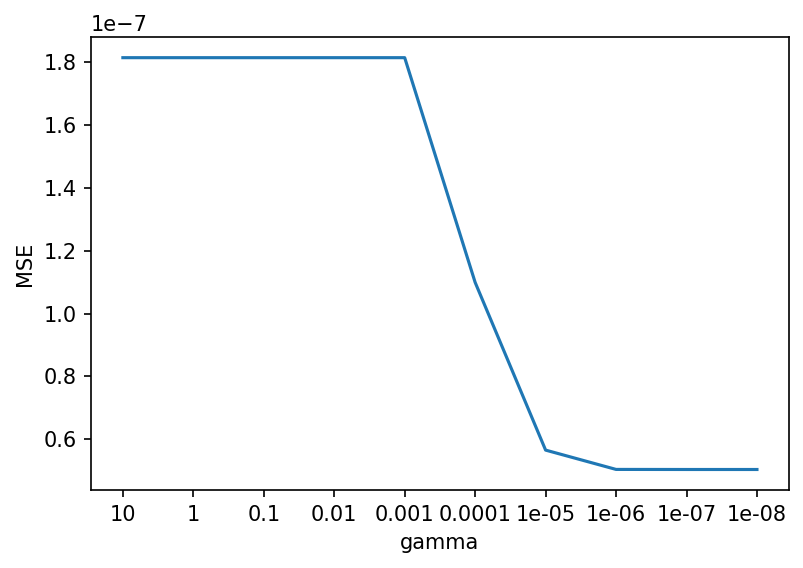

In [67]:
MSE = [1.8145786977222073e-07, 1.8145786977222073e-07, 1.8145786977222073e-07, 1.8145786977222073e-07, 1.8145786977222073e-07, 1.0990430088885976e-07, 5.6504932661172346e-08, 5.035439500603544e-08,5.0332348694411145e-08,5.0332348694411145e-08]
plt.figure(dpi=150)
plt.plot(list(range(10)),MSE)
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.xticks(range(10),G)
plt.show()

gamma 的值太大，会导致增益小于0，导致树停止划分，即欠拟合，所以gamma要取合适的值  
由图可知 gamma 取 $10^{-7}$ 比较合适

下面对于**树的最大深度**进行调整：

In [37]:
depth = [1,2,3,4,5,6,7,8,9,10]
MSE1 = []
for i in depth:
    model = XGBoost()
    print("树最大深度为",i)
    model.fit(train_features,train_labels,max_epoch=3,max_depth=i,Lambda=1.0,gamma=1e-7)
    print("测试集MSE:",np.sum((test_labels[:,1]-model.predict(test_features))**2)/len(test_labels))
    MSE1.append(np.sum((test_labels[:,1]-model.predict(test_features))**2)/len(test_labels))

树最大深度为 1
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [1.0581966568045392e-07, 8.023217869447142e-08, 7.021451047401973e-08]
RMSE [0.00032529934780207276, 0.00028325285293262525, 0.00026498020770242395]
R2 [0.3673832457089642, 0.5203517214969793, 0.5802398785274847]
测试集MSE: 9.507436753932687e-08
树最大深度为 2
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [7.578792726209451e-08, 5.680626896711816e-08, 4.9079137751094594e-08]
RMSE [0.0002752960720062938, 0.0002383406573942393, 0.00022153811805442105]
R2 [0.5469205818153774, 0.6603977411355613, 0.7065924880044762]
测试集MSE: 6.190410120035206e-08
树最大深度为 3
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [5.952444114632348e-08, 4.3894916300360666e-08, 3.8276295669204835e-08]
RMSE [0.00024397631267466003, 0.00020951113645904522, 0.00019564328679820537]
R2 [0.6441478196246989, 0.7375850764482237, 0.7711746131795895]
测试集MSE: 5.0332348694411145e-08
树最大深度为 

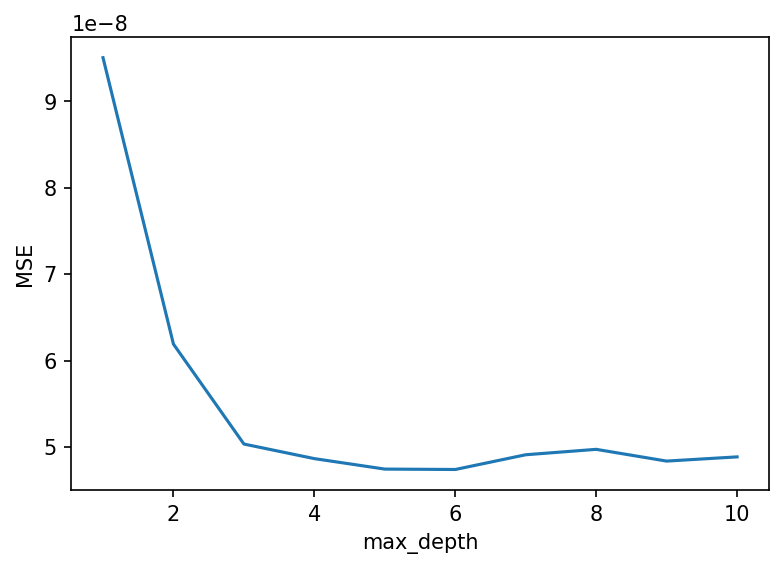

In [66]:
plt.figure(dpi=150)
plt.plot(list(range(1,11,1)),MSE1)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

下面对于**树的个数**进行调整：

In [74]:
num = [2,3,4,5,6,7,8,9,10]
MSE2 = []
for i in num:
    model = XGBoost()
    print("树的棵树为",i)
    model.fit(train_features,train_labels,max_epoch=i,max_depth=6,Lambda=1.0,gamma=1e-7)
    print("测试集MSE:",np.sum((test_labels[:,1]-model.predict(test_features))**2)/len(test_labels))
    MSE2.append(np.sum((test_labels[:,1]-model.predict(test_features))**2)/len(test_labels))

树的棵树为 2
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
MSE [3.408028191346458e-08, 2.8721553461923555e-08]
RMSE [0.00018460845569329858, 0.00016947434455375114]
R2 [0.7962594458148833, 0.8282952812934969]
测试集MSE: 4.740466335557085e-08
树的棵树为 3
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
MSE [3.408028191346458e-08, 2.8721553461923555e-08, 2.662714298552536e-08]
RMSE [0.00018460845569329858, 0.00016947434455375114, 0.00016317825524721533]
R2 [0.7962594458148833, 0.8282952812934969, 0.8408161974125591]
测试集MSE: 4.7384561128639065e-08
树的棵树为 4
第 1 颗树正在训练...
第 1 颗树训练完成
第 2 颗树正在训练...
第 2 颗树训练完成
第 3 颗树正在训练...
第 3 颗树训练完成
第 4 颗树正在训练...
第 4 颗树训练完成
MSE [3.408028191346458e-08, 2.8721553461923555e-08, 2.662714298552536e-08, 2.5639266711911172e-08]
RMSE [0.00018460845569329858, 0.00016947434455375114, 0.00016317825524721533, 0.00016012266145649457]
R2 [0.7962594458148833, 0.8282952812934969, 0.8408161974125591, 0.8467219719000925]
测试集MSE: 4.645405545610382e-08
树的棵树为 5


得到以下图像：

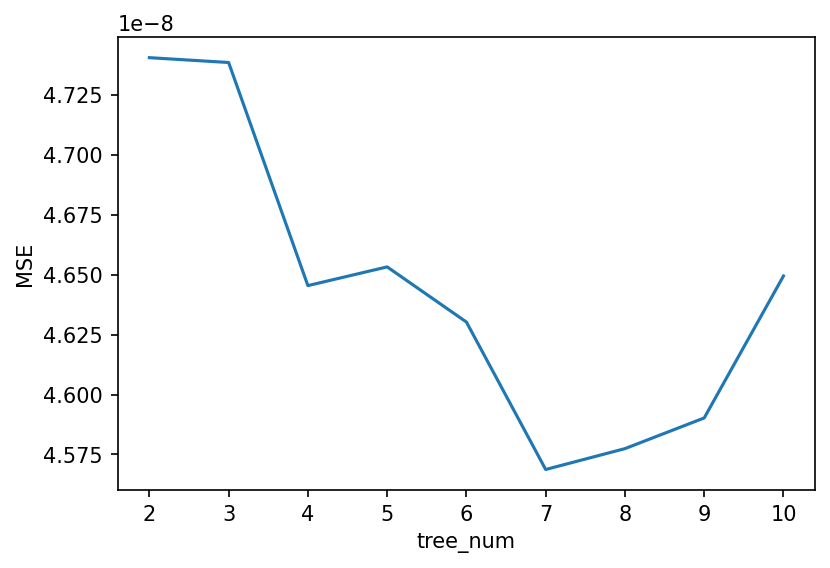

In [75]:
plt.figure(dpi=150)
plt.plot(list(range(2,11,1)),MSE2)
plt.xlabel('tree_num')
plt.ylabel('MSE')
plt.show()

这个图像说明不了什么问题，于是加大了树的个数（这里对于XGBoost做了一些修改，使得计算第k+1颗树的时候可以用到第k个树的结果，否则运行速度实在过慢。得到结果之后又改了回去，见XGBoost中的注释）

In [78]:
model = XGBoost()
print("树的棵树为",100)
model.fit(train_features,train_labels,max_epoch=100,max_depth=6,Lambda=1.0,gamma=1e-7)

树的棵树为 100
第 1 颗树正在训练...
第 1 颗树训练完成
测试集MSE 5.305245782393965e-08
第 2 颗树正在训练...
第 2 颗树训练完成
测试集MSE 4.740466335557085e-08
第 3 颗树正在训练...
第 3 颗树训练完成
测试集MSE 4.7384561128639065e-08
第 4 颗树正在训练...
第 4 颗树训练完成
测试集MSE 4.645405545610382e-08
第 5 颗树正在训练...
第 5 颗树训练完成
测试集MSE 4.653218086294867e-08
第 6 颗树正在训练...
第 6 颗树训练完成
测试集MSE 4.6302216766941425e-08
第 7 颗树正在训练...
第 7 颗树训练完成
测试集MSE 4.568726000423768e-08
第 8 颗树正在训练...
第 8 颗树训练完成
测试集MSE 4.5774254846105484e-08
第 9 颗树正在训练...
第 9 颗树训练完成
测试集MSE 4.5902212064333414e-08
第 10 颗树正在训练...
第 10 颗树训练完成
测试集MSE 4.6494145363453886e-08
第 11 颗树正在训练...
第 11 颗树训练完成
测试集MSE 4.64930948460532e-08
第 12 颗树正在训练...
第 12 颗树训练完成
测试集MSE 4.649309475526728e-08
第 13 颗树正在训练...
第 13 颗树训练完成
测试集MSE 4.649309475525934e-08
第 14 颗树正在训练...
第 14 颗树训练完成
测试集MSE 4.649309475525934e-08
第 15 颗树正在训练...
第 15 颗树训练完成
测试集MSE 4.649309475525934e-08
第 16 颗树正在训练...
第 16 颗树训练完成
测试集MSE 4.649309475525934e-08
第 17 颗树正在训练...
第 17 颗树训练完成
测试集MSE 4.649309475525934e-08
第 18 颗树正在训练...
第 18 颗树训练完成
测试集MSE 4.649309475525934e

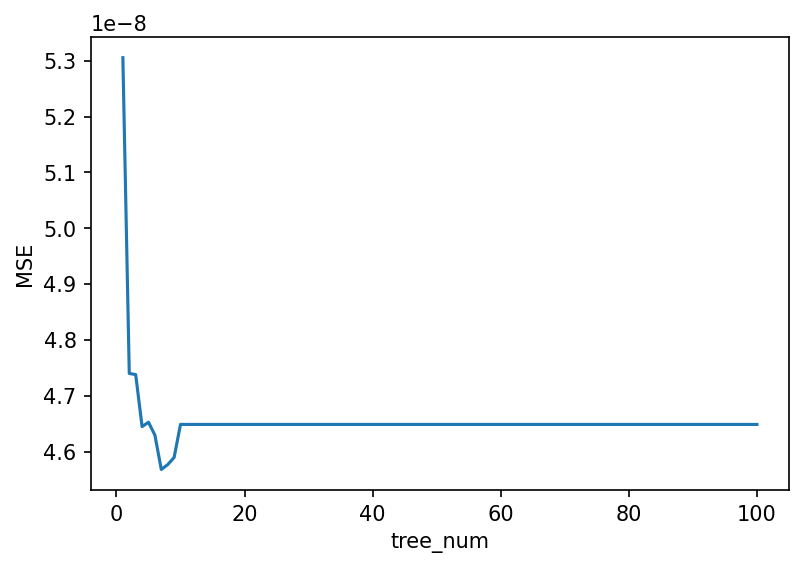

In [79]:
plt.figure(dpi=150)
plt.plot(list(range(1,101,1)),model.temp)
plt.xlabel('tree_num')
plt.ylabel('MSE')
plt.show()

通过下面的XGBoost库测试了一下 Lambda 取65的时候测试集上的 MSE 最小，所以又调整了 Lambda 的值

In [82]:
model = XGBoost()
print("树的棵树为",100)
model.fit(train_features,train_labels,max_epoch=100,max_depth=6,Lambda=65.0,gamma=1e-7)

树的棵树为 100
第 1 颗树正在训练...
第 1 颗树训练完成
测试集MSE 8.345305046953396e-08
第 2 颗树正在训练...
第 2 颗树训练完成
测试集MSE 5.765030271323822e-08
第 3 颗树正在训练...
第 3 颗树训练完成
测试集MSE 4.6769021873571744e-08
第 4 颗树正在训练...
第 4 颗树训练完成
测试集MSE 4.524153406995468e-08
第 5 颗树正在训练...
第 5 颗树训练完成
测试集MSE 4.290185908668778e-08
第 6 颗树正在训练...
第 6 颗树训练完成
测试集MSE 4.165896460112209e-08
第 7 颗树正在训练...
第 7 颗树训练完成
测试集MSE 4.124307710676793e-08
第 8 颗树正在训练...
第 8 颗树训练完成
测试集MSE 3.9484470026345275e-08
第 9 颗树正在训练...
第 9 颗树训练完成
测试集MSE 3.867041273410936e-08
第 10 颗树正在训练...
第 10 颗树训练完成
测试集MSE 3.8946477258922064e-08
第 11 颗树正在训练...
第 11 颗树训练完成
测试集MSE 3.895673628444789e-08
第 12 颗树正在训练...
第 12 颗树训练完成
测试集MSE 3.8956795188221944e-08
第 13 颗树正在训练...
第 13 颗树训练完成
测试集MSE 3.89567955208692e-08
第 14 颗树正在训练...
第 14 颗树训练完成
测试集MSE 3.895679552274758e-08
第 15 颗树正在训练...
第 15 颗树训练完成
测试集MSE 3.8956795522758196e-08
第 16 颗树正在训练...
第 16 颗树训练完成
测试集MSE 3.895679552275825e-08
第 17 颗树正在训练...
第 17 颗树训练完成
测试集MSE 3.895679552275825e-08
第 18 颗树正在训练...
第 18 颗树训练完成
测试集MSE 3.895679552275825e

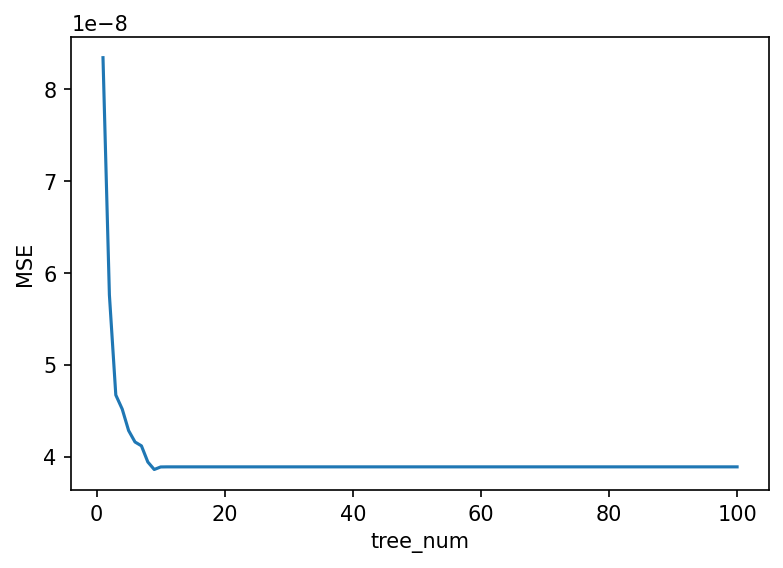

In [83]:
plt.figure(dpi=150)
plt.plot(list(range(1,101,1)),model.temp)
plt.xlabel('tree_num')
plt.ylabel('MSE')
plt.show()

可以见得，改变 Lambda 确实使得模型效果更好

综上，调参后的各个参数取值为：
- gamma:  $10^{-7}$
- Lambda:  $65$
- max_epoch:  $11$
- max_depth:  $6$

## LOSS 曲线

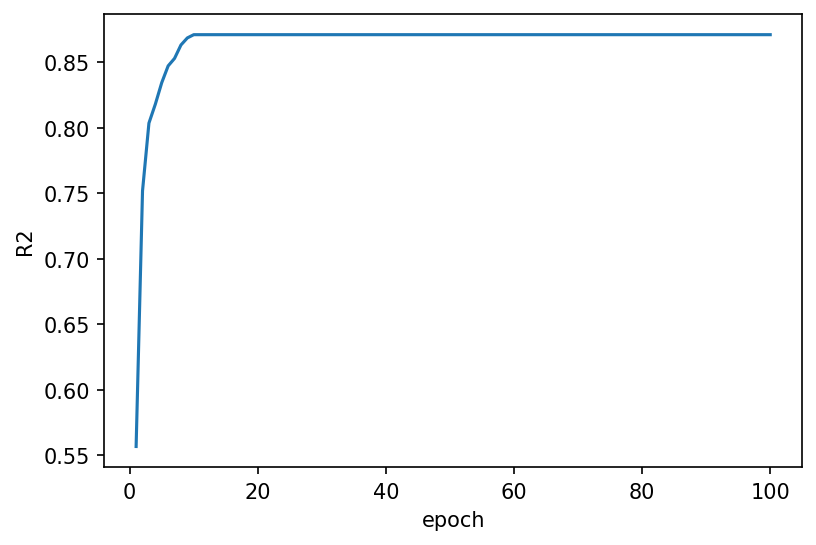

In [85]:
plt.figure(dpi=150)
plt.plot(list(range(1,101,1)),model.R2_)
plt.xlabel('epoch')
plt.ylabel('R2')
plt.show()

## XGBoost库

In [24]:
from xgboost import XGBRegressor as XGBR
from sklearn.metrics import mean_squared_error as MSE

index=df.columns[0:40].values
Features = df[index].values
Labels = df[df.columns[40]].values
train_features = Features[:round(0.8 * len(Features))]
train_labels = Labels[:round(0.8 * len(Features))]
test_features = Features[round(0.8 * len(Features)):]
test_labels = Labels[round(0.8 * len(Features)):]

reg = XGBR(n_estimators = 100,max_depth=100,gamma=1e-6,reg_lambda=65).fit(train_features,train_labels)#训练
print(reg.predict(test_features))
print(reg.score(test_features,test_labels))
print(MSE(test_labels,reg.predict(test_features)))

[-0.00107681 -0.00107681 -0.00070557 ... -0.00057007 -0.00057007
 -0.0005669 ]
0.7956468613348178
3.5846123236281804e-08
